# **K-Nearest Neighbors**

## **Câu hỏi 3**

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [3]:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(iris_X,iris_y,test_size=0.2,random_state=42)


In [4]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [6]:
# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

## **Câu hỏi 5**

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


In [8]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)



In [9]:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(diabetes_X,diabetes_y,test_size=0.2,random_state=42)


In [10]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Build KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

## **Câu hỏi 7**

In [12]:
# Import library
!pip install -q datasets
import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [13]:
# Load IMDB dataset
imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb['train'], imdb['test']


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [14]:
# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])


In [15]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [17]:
# predict test set and evaluate
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)


0.60444

# **K-Mean**

Import các thư viện cần thiết

In [18]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt


Gọi tới hàm load_iris để lấy bộ iris dataset từ thư viện sklearn. Sau đó lấy 2 features đầu và xem
như bài toán của chúng ta đang thực hiện trên tập dữ liệu 2 chiều.


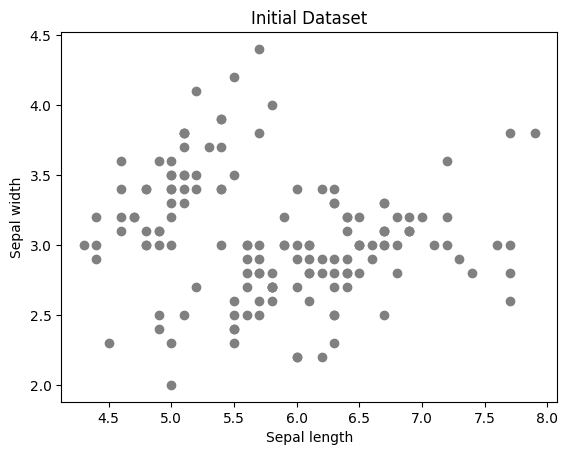

In [19]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]

# Plot data
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


Khai báo class KMeans


In [20]:
class KMeans:

  def __init__(self, k=3, max_iters=100):
    self.k = k                   # số cụm
    self.max_iters = max_iters   # số vòng lặp tối đa
    self.centroids = None        # tọa độ tâm cụm
    self.clusters = None         # cụm của từng điểm dữ liệu

  def initialize_centroids(self, data):
    np.random.seed(42)
    self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

  def euclidean_distance(self, x1, x2):
    return np.sqrt(np.sum(np.power(x1 - x2, 2)))

  def assign_clusters(self, data):
    # Tính toán khoảng cách giữa mỗi điểm dữ liệu (data point) và tâm (centroids) bằng cách sử dụng hàm euclidean_distance
    distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])

    return np.argmin(distances, axis=1)

  def update_centroids(self, data):
    return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

  def fit(self, data):
    # Gọi tới phương thức khởi tạo ngẫu nhiên tâm cụm
    self.initialize_centroids(data)

    for i in range(self.max_iters):
        # Gán cụm cho các data point gần nhất
        self.clusters = self.assign_clusters(data)
        # Visualize các cụm và tâm cụm tại iteration này
        self.plot_clusters(data, i)
        # Dựa vào các data point của từng cụm, dịch chuyển tâm cụm tới vị trí trung tâm (tính mean) của cụm
        new_centroids = self.update_centroids(data)
        # Nếu tâm cụm không di chuyển, dừng lại
        if np.all(self.centroids == new_centroids):
            break
        # Nếu tâm cụm có di chuyển, thực hiện lại vòng lặp với các giá trị tâm cụm mới
        self.centroids = new_centroids
    # Plot kết quả cuối cùng của các cụm, tâm cụm
    self.plot_final_clusters(data)


  def plot_clusters(self, data, iteration):
    plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
    plt.title(f"Iteration {iteration + 1}")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

  def plot_final_clusters(self, data):
    plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
    plt.title("Final Clusters and Centroids")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()


Khởi tạo đối tượng của lớp K-Mean và xem cách mà thuật toán này thực hiện
phân cụm.


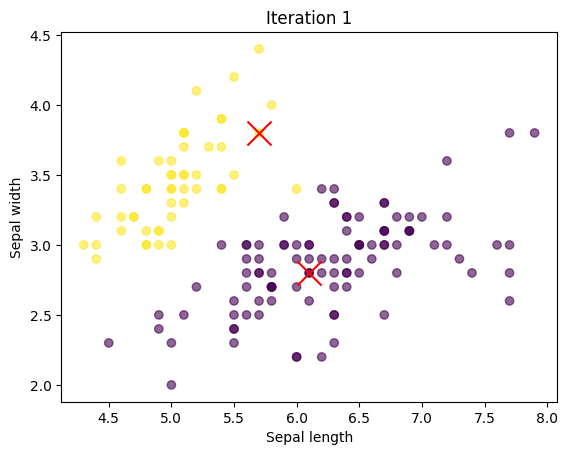

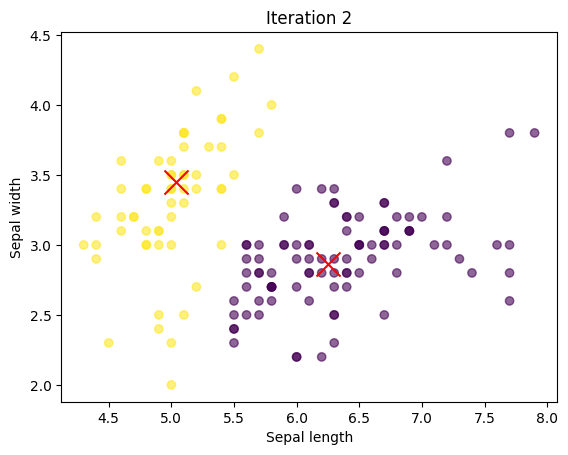

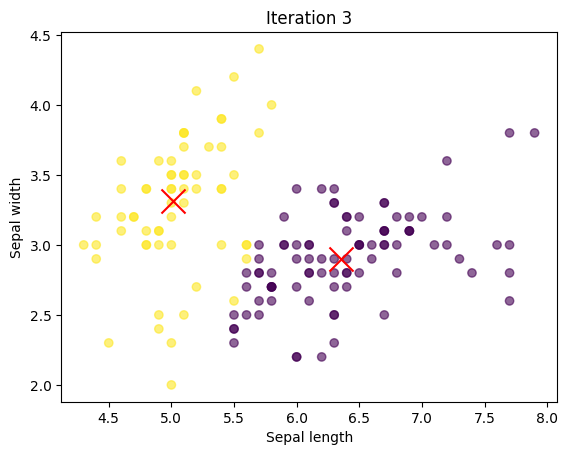

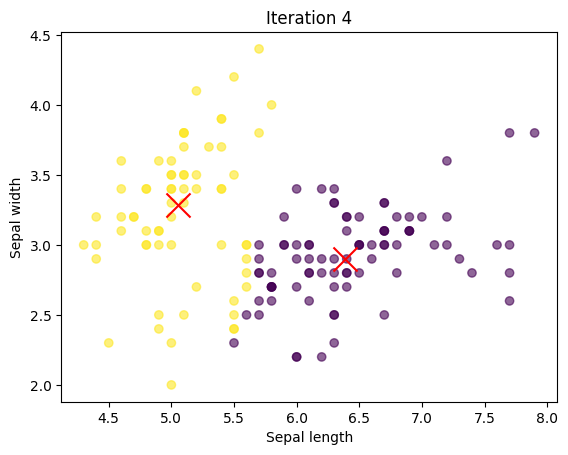

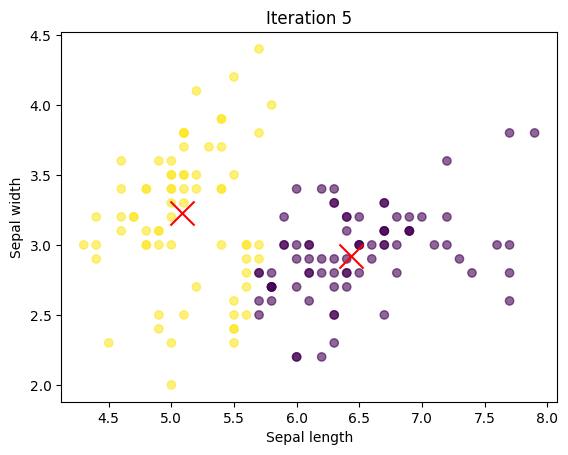

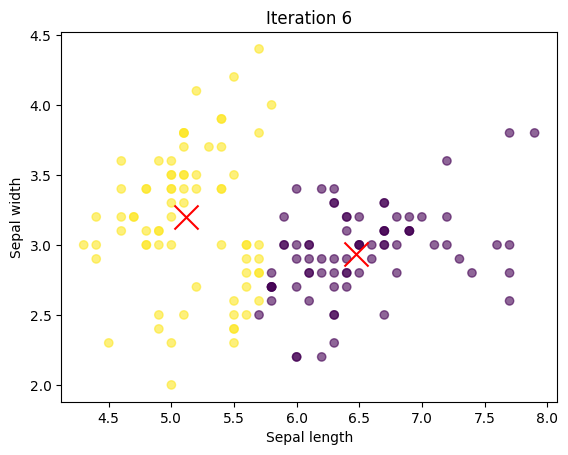

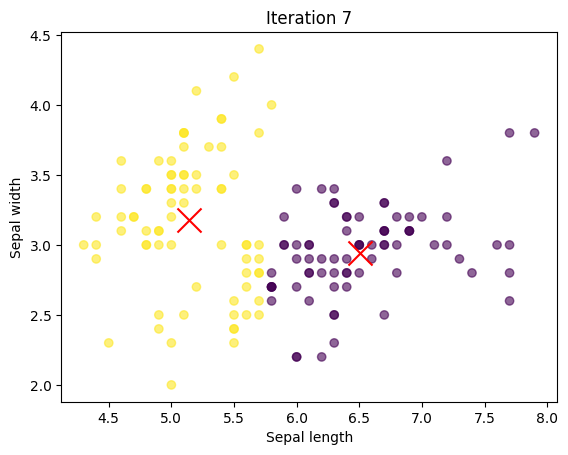

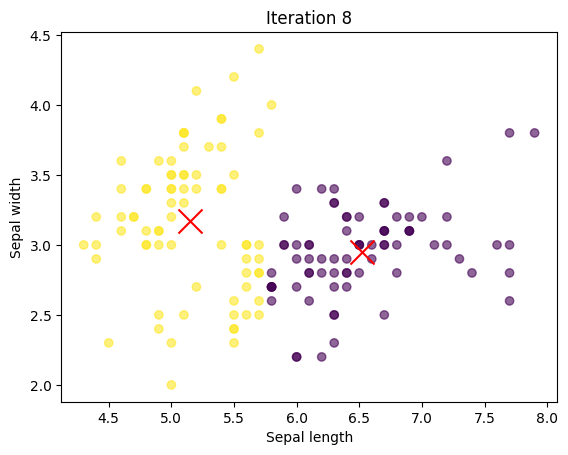

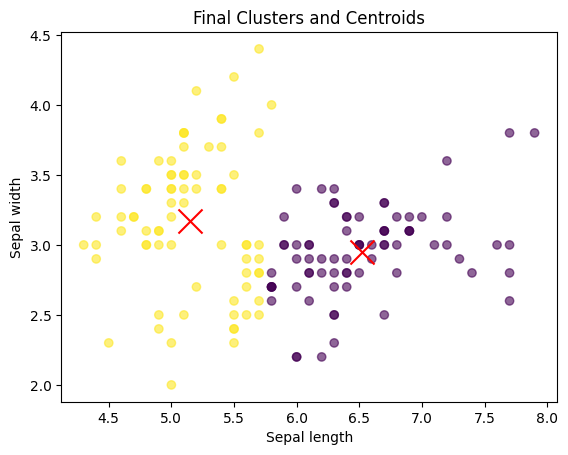

In [21]:
kmeans = KMeans(k=2)
kmeans.fit(data)



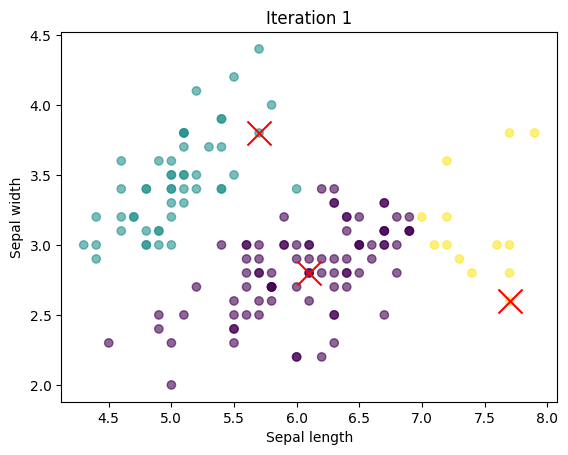

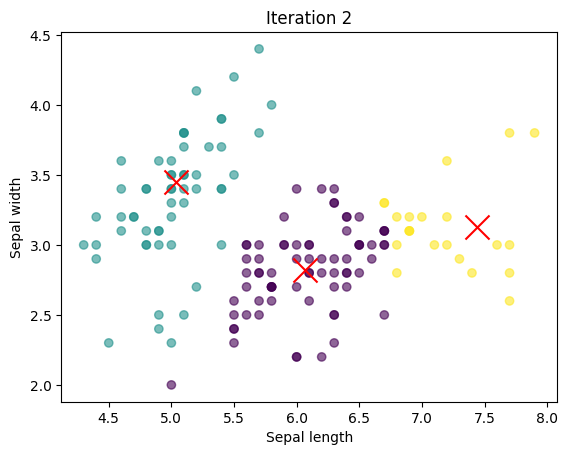

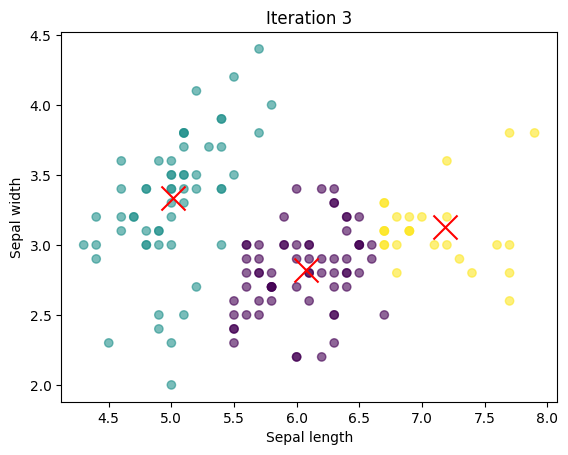

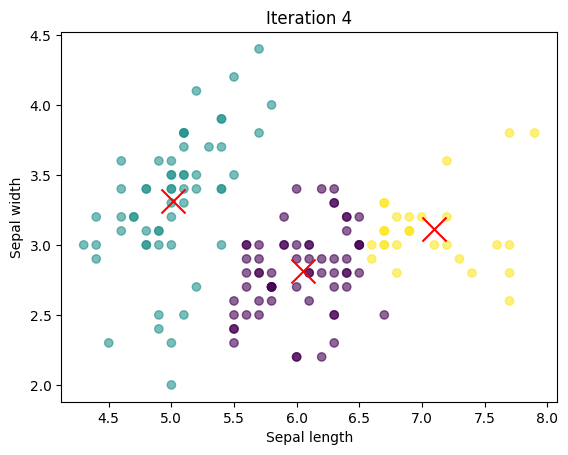

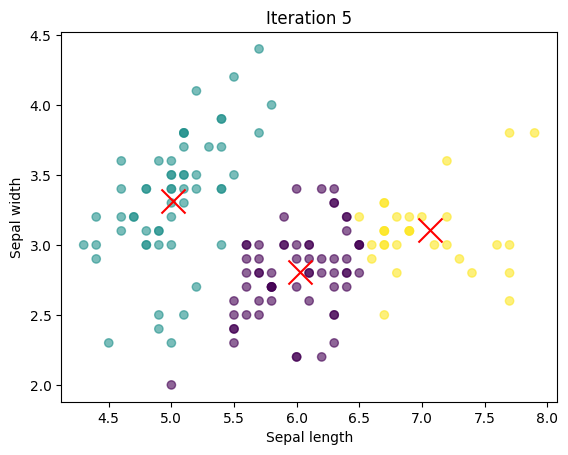

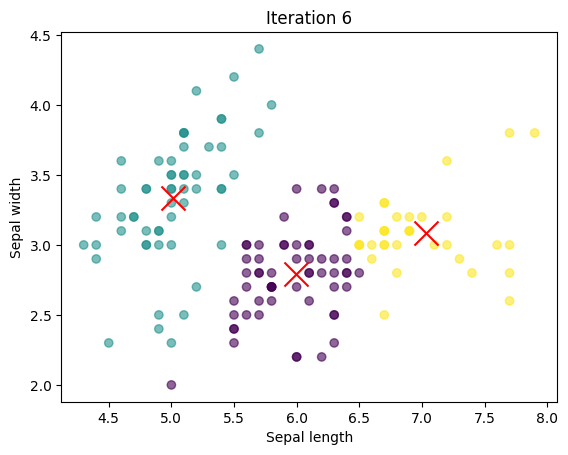

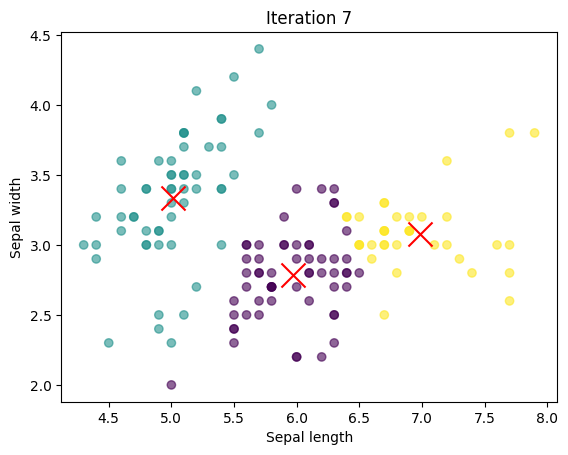

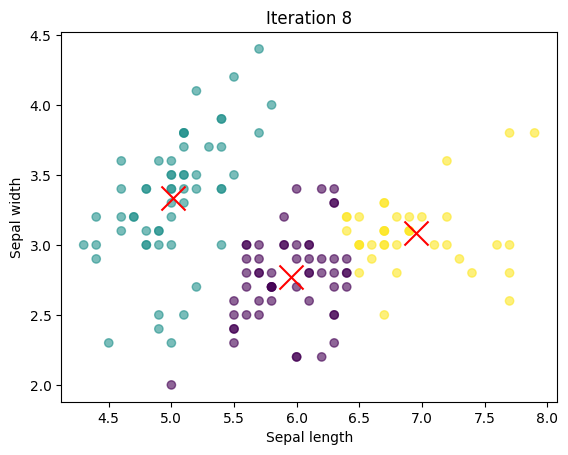

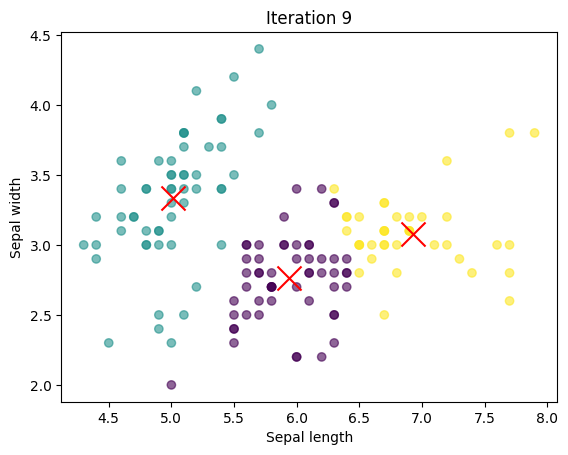

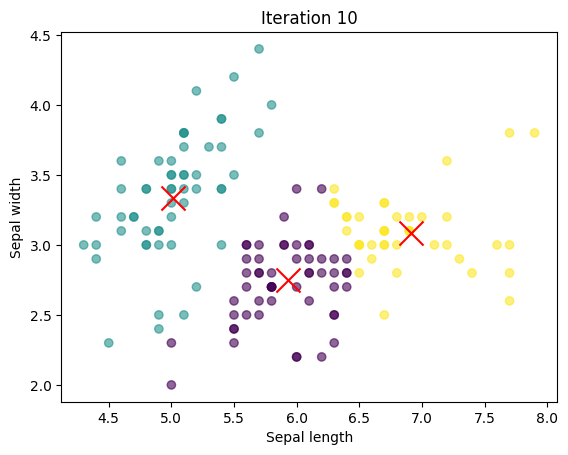

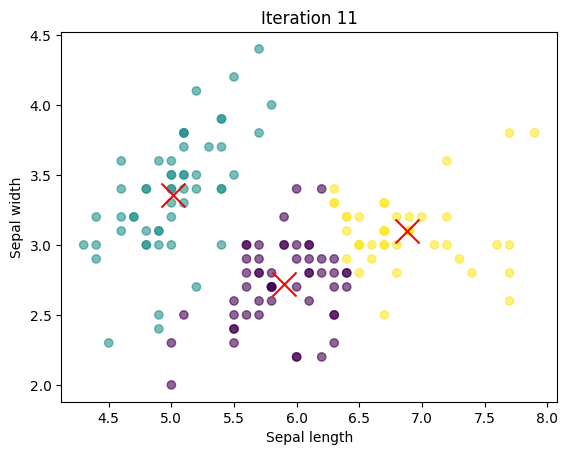

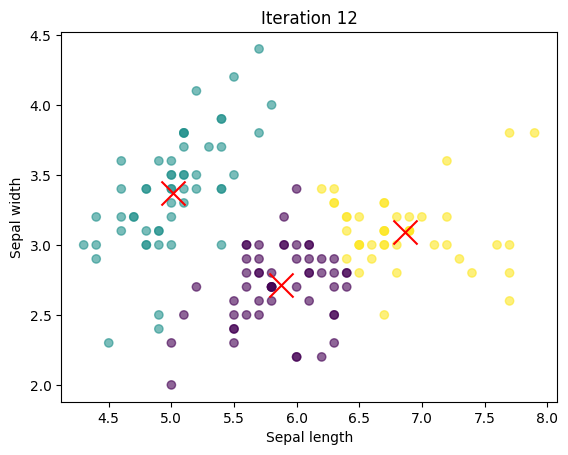

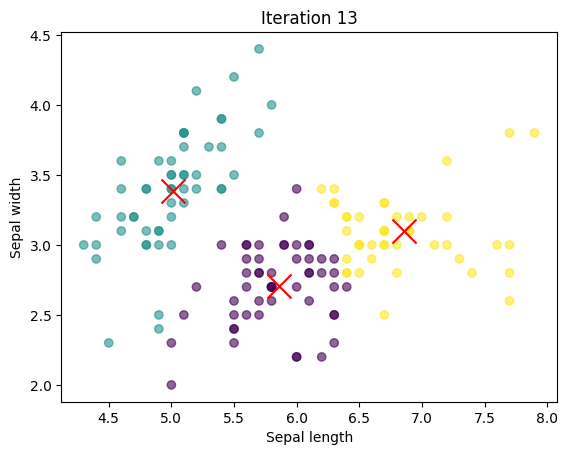

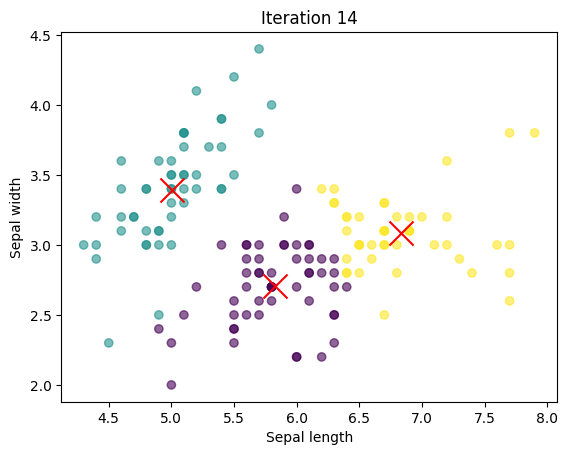

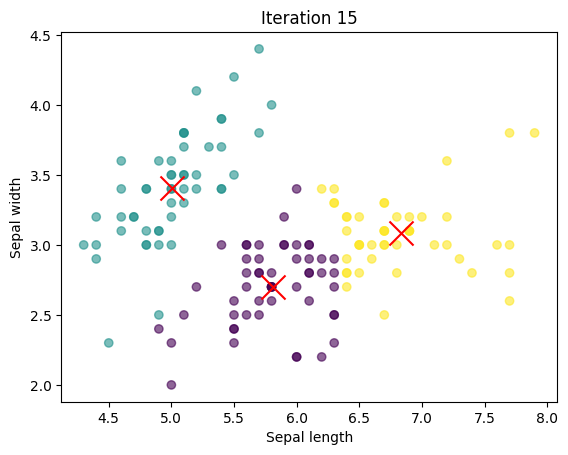

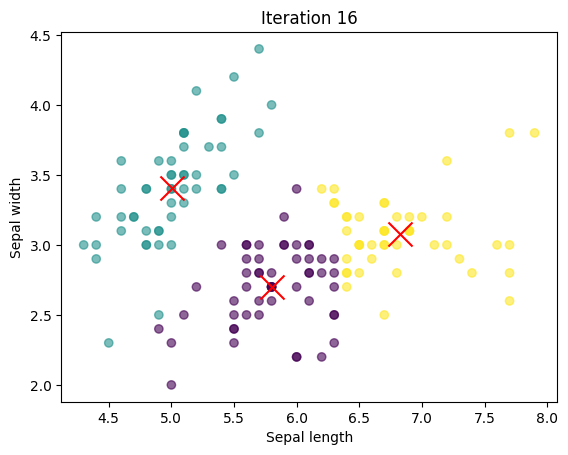

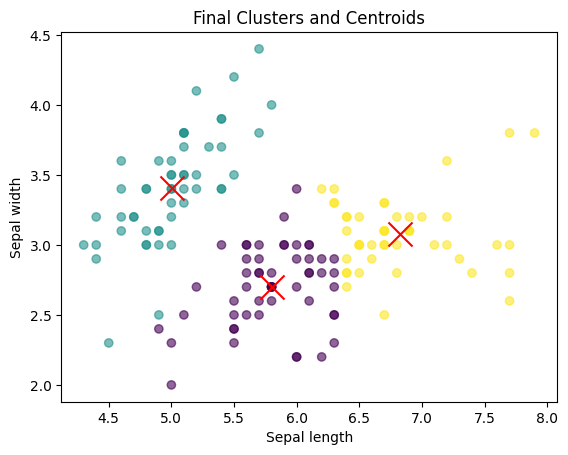

In [22]:
kmeans = KMeans(k=3)
kmeans.fit(data)


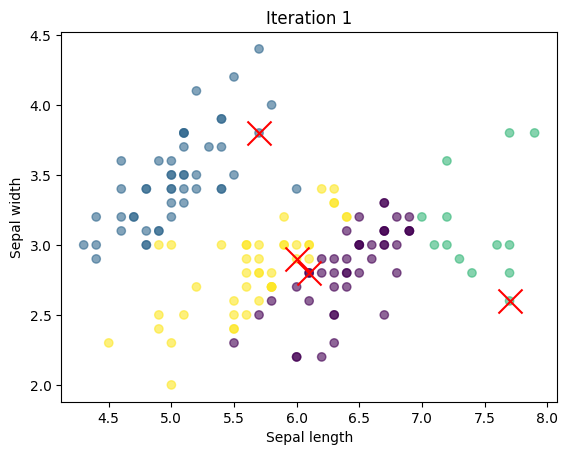

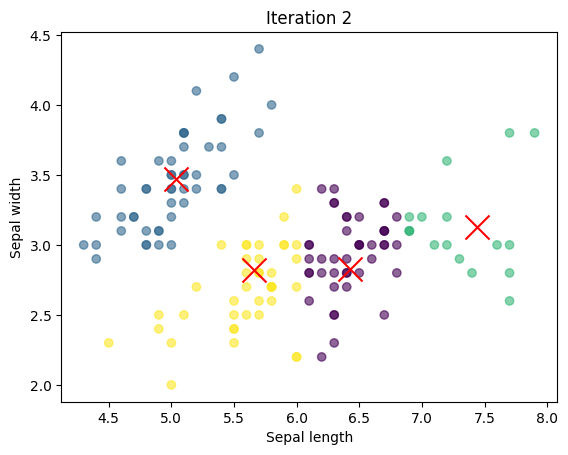

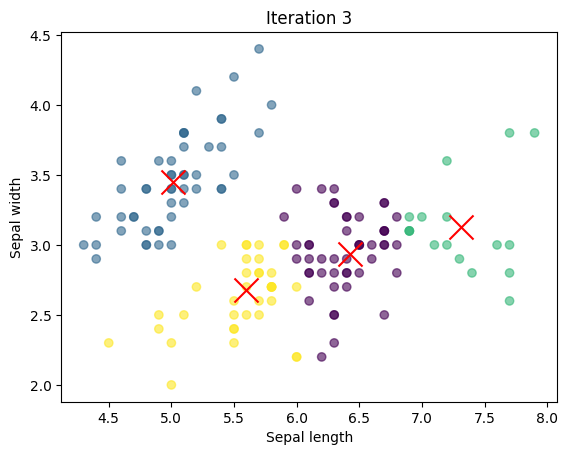

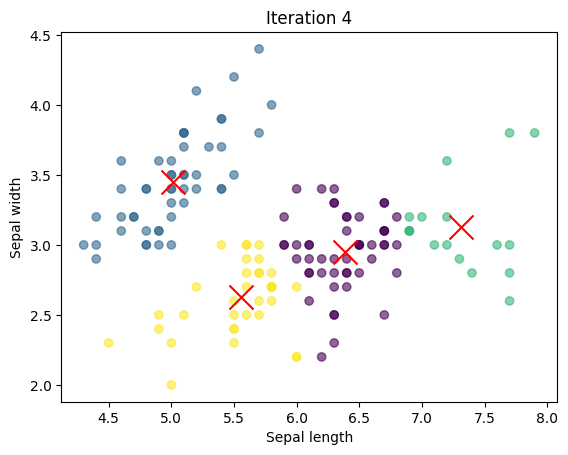

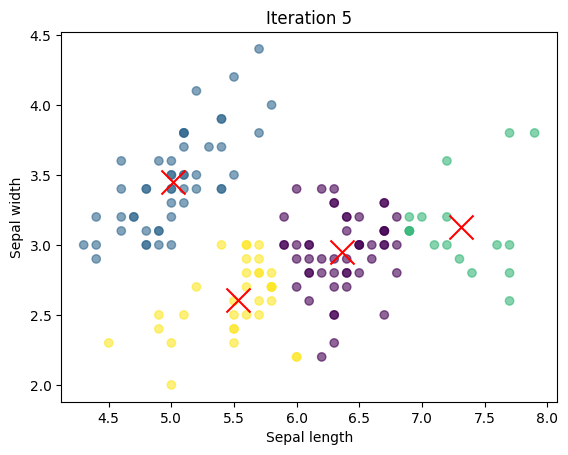

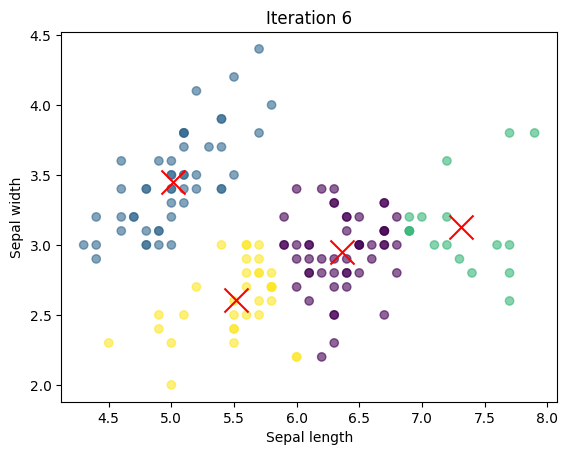

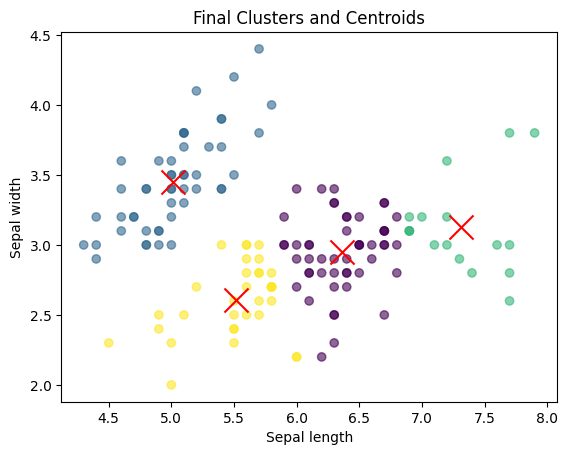

In [23]:
kmeans = KMeans(k=4)
kmeans.fit(data)
